In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
MallData = pd.read_csv('/users/josecuellargonzalez/Documents/Mall_Customers.csv')
#This is a data set from Kaggle that is about clustering customers based on their spending habits

In [3]:
MallData.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
MallData.describe()
#describtion of the dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


(array([12., 43., 61., 39., 25., 18.,  2.]),
 array([10, 20, 30, 40, 50, 60, 70, 80]),
 <a list of 7 Patch objects>)

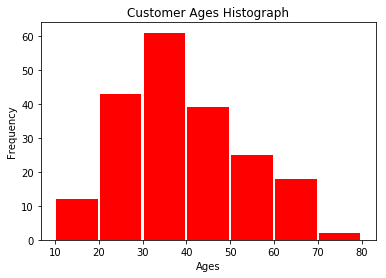

In [5]:
plt.title('Customer Ages Histograph')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.hist(MallData['Age'],rwidth = .95,color = 'r',bins =  [10,20,30,40,50,60,70,80])

(array([12., 18., 16., 26., 20., 32., 38., 16.,  8.,  6.,  2.,  4.,  2.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140]),
 <a list of 13 Patch objects>)

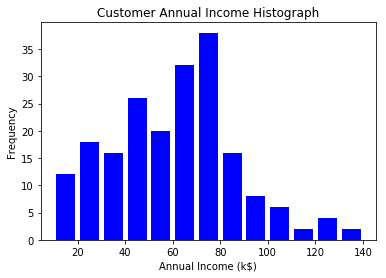

In [6]:
plt.title('Customer Annual Income Histograph')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.hist(MallData['Annual Income (k$)'],rwidth = .8,color = 'blue',
         bins = [10,20,30,40,50,60,70,80,90,100,110,120,130,140])

In [7]:
genders = MallData.groupby('Gender')



In [8]:
females = genders.get_group('Female')
males = genders.get_group('Male')

In [9]:
fValue = len(females)
mValues = len(males)
tValues = [mValues,fValue]

([<matplotlib.patches.Wedge at 0x10b14d668>,
 [Text(-1.08052,0.206119,'Male'), Text(1.17874,-0.224858,'Female')],
 [Text(-0.589372,0.112429,'44%'), Text(0.687601,-0.131167,'56%')])

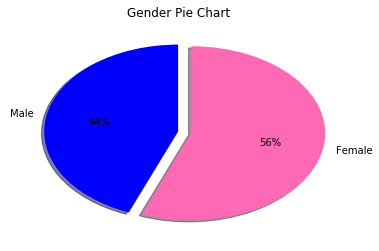

In [10]:
plt.title('Gender Pie Chart')
plt.pie(tValues,labels = ['Male','Female'],radius = 1,colors = ['b','hotpink'],startangle = 90,shadow = True, 
        explode = (0,.1), autopct = '%1.0f%%')

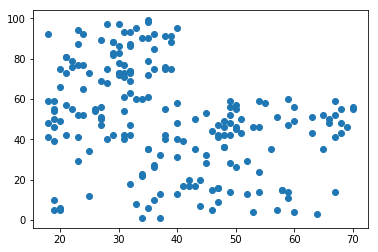

In [11]:
plt.scatter(MallData['Age'],MallData['Spending Score (1-100)'])
#Creates a scatterplot that'll let me eyeball the relationship between both data

In [12]:
k_range = range(1,10,1)
sse = []
    

In [13]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(MallData[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)
    
#This for loop will check multiple kmeans depending on the range previously stated above and append thise results 
#to sse

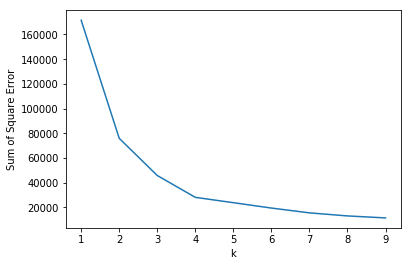

In [14]:
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_range,sse)
## This will plot the elbow graph that will tell us the ideal amount of clusters to input into n_clusters

In [15]:
kmean = KMeans(n_clusters = 4)
y_predicted = kmean.fit_predict(MallData[['Age','Spending Score (1-100)']])

In [16]:
MallData['cluster'] = y_predicted

In [17]:
y_predicted

array([3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [18]:
MallData0 = MallData[MallData.cluster == 0]
MallData1 = MallData[MallData.cluster == 1]
MallData2 = MallData[MallData.cluster == 2]
MallData3 = MallData[MallData.cluster == 3]
#

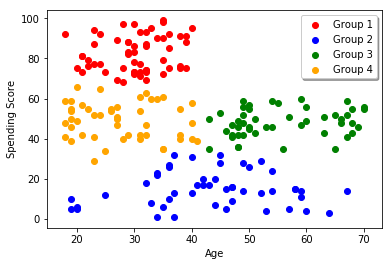

In [19]:
plt.scatter(MallData0['Age'],MallData0['Spending Score (1-100)'], color = 'r',label = 'Group 1')
plt.scatter(MallData1['Age'],MallData1['Spending Score (1-100)'],color = 'blue', label = 'Group 2')
plt.scatter(MallData2['Age'],MallData2['Spending Score (1-100)'],color = 'green', label = 'Group 3')
plt.scatter(MallData3['Age'],MallData3['Spending Score (1-100)'], color = 'orange', label = 'Group 4')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(shadow = True)
# This will create a scatter plot that has four clusters based on the elbow graph from above with the variable 
# and spending score

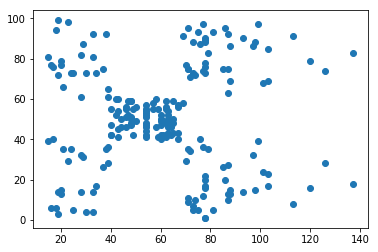

In [20]:
plt.scatter(MallData['Annual Income (k$)'],MallData['Spending Score (1-100)'])
#Scatterplot based on Annual Income and Spending Score

In [21]:
s_range = range(1,10,1)
ssee = []

In [22]:
for i in s_range:
    kms = KMeans(n_clusters = i)
    kms.fit(MallData[['Annual Income (k$)','Spending Score (1-100)']])
    ssee.append(kms.inertia_)

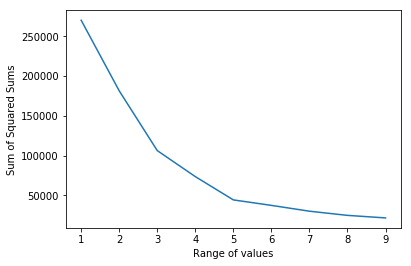

In [23]:
plt.xlabel('Range of values')
plt.ylabel('Sum of Squared Sums')
plt.plot(s_range,ssee)
# The elbow suggests there to be 5 k values

In [24]:
kmeans = KMeans(n_clusters = 5)
second_predict = kmeans.fit_predict(MallData[['Annual Income (k$)','Spending Score (1-100)']])

In [25]:
MallData['cluster2'] = second_predict

In [26]:
df1 = MallData[MallData.cluster2 == 0]
df2 = MallData[MallData.cluster2 == 1]
df3 = MallData[MallData.cluster2 == 2]
df4 = MallData[MallData.cluster2 == 3]
df5 = MallData[MallData.cluster2 == 4]

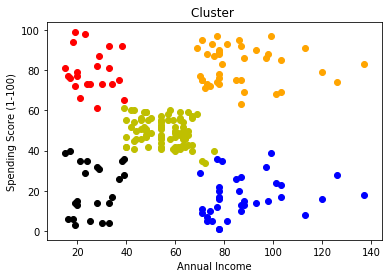

In [27]:
plt.title('Cluster ')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color = 'r')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color = 'blue')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color = 'y')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color = 'k')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color = 'orange')

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#Machine learning algorithms to possibly use: Random Forest, Support Vector, Logistic Regression

In [34]:
MallData

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster2
195,196,Female,35,120,79,0,4
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,0,4
198,199,Male,32,137,18,1,1
199,200,Male,30,137,83,0,4


In [36]:
target_var = MallData['Spending Score (1-100)']
#This is the the MallData target variable I'll use to train the three ML models

In [45]:
gender_dummies = pd.get_dummies(MallData.Gender)

In [46]:
UMallData = pd.concat([MallData,gender_dummies],axis = 'columns')

In [49]:
MLMallData = UMallData.drop(['Gender','CustomerID','cluster','cluster2','Male'],axis = 'columns')
#Deletes unneccessary columns for Classicfication ML Models

In [52]:
x_train,x_test,y_train,y_test = train_test_split(MLMallData,target_var,test_size = .2)
# separates datasets into train and test

In [54]:
from sklearn.model_selection import cross_val_score

In [56]:
cross_val_score(LogisticRegression(),MLMallData,target_var)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.09803922, 0.10447761, 0.06451613])

In [57]:
cross_val_score(SVC(),MLMallData,target_var)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.04901961, 0.05970149, 0.06451613])

In [58]:
cross_val_score(RandomForestClassifier(),MLMallData,target_var)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.25490196, 0.40298507, 0.19354839])